# Analyzing  Drinking Habits Around The World


## Objectives

* We will clean the dataset
* Analyze it
* Perform Exploratory Data Analysis (EDA)
* Build a prediction model that predicts the total litres of alcohol using some variables from our dataset


This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings.


We will need the following libraries:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline


<b>Importing the Data</b>


Load the csv:


In [3]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [4]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Task 1</b>:  Display the data types of each column using the attribute dtype.


In [5]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Task 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:


In [6]:
df_test = df[['wine_servings','continent']]
df_grp = df_test.groupby(['wine_servings','continent'], as_index=False)
df_grp.head()


,wine_servings,continent
0,0,Asia
1,54,Europe
2,14,Africa
3,312,Europe
4,45,Africa
...,...,...
186,8,Asia
187,11,Oceania
188,3,South America
191,4,Africa


<b>Task 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [7]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<b>Task 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


<AxesSubplot:xlabel='continent', ylabel='beer_servings'>

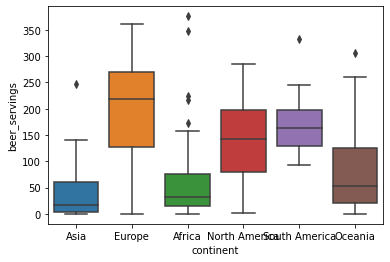

In [8]:
sns.boxplot(x="continent", y="beer_servings", data=df)

<b>Task 5:</b> Print the 15 countries that consume the most beer

In [9]:
beer_ser = df.sort_values(by='beer_servings', ascending=False)[:15]

<AxesSubplot:xlabel='country'>

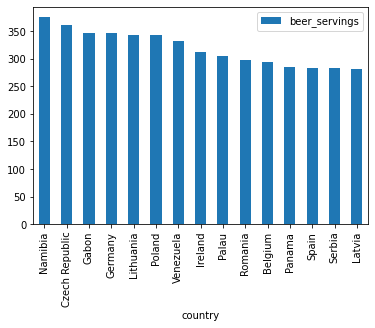

In [10]:
beer_ser.plot(x="country", y="beer_servings", kind="bar", rot=90, fontsize=10)

<b>Task 6:</b> Print the 15 countries that consume the most wine

In [11]:
wine_ser = df.sort_values(by='wine_servings', ascending=False)[:15]

<AxesSubplot:xlabel='country'>

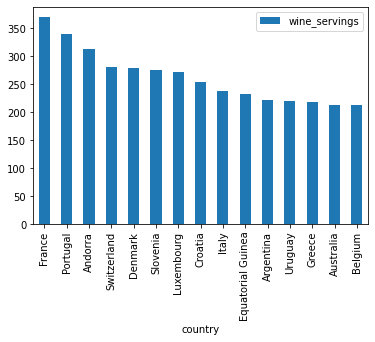

In [12]:
wine_ser.plot(x="country", y="wine_servings", kind="bar", rot=90, fontsize=10)

<b>Task 7:</b> Print the 15 countries that consume the most total litres of pure alcohol

In [13]:
total_lit = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False)[:15]

<AxesSubplot:xlabel='country'>

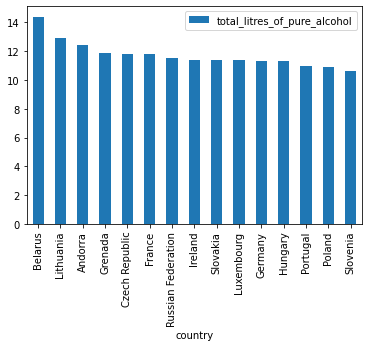

In [14]:
total_lit.plot(x="country", y="total_litres_of_pure_alcohol", kind="bar", rot=90, fontsize=10)

<b>Task 8:</b> Print a correlation map 

In [15]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.00,0.46,0.53,0.84
spirit_servings,0.46,1.00,0.19,0.65
wine_servings,0.53,0.19,1.00,0.67
total_litres_of_pure_alcohol,0.84,0.65,0.67,1.00


<b>Task 9</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


(0.0, 388.65906960801607)

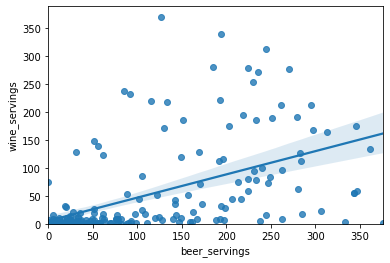

In [16]:
sns.regplot(x="beer_servings",y="wine_servings",data=df)
plt.ylim(0,)

<b> Task 10:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
X = df[['wine_servings']]
Y = df[['total_litres_of_pure_alcohol']]
lm.fit(X,Y)
lm.score(X,Y)

0.4456875459787605

#### Task 11:

Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data.


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

features = ['beer_servings', 'spirit_servings','wine_servings']    
X = df[features ]
Y = df['total_litres_of_pure_alcohol']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()

lre.fit(x_train, y_train)

lre.score(x_test, y_test)


number of test samples : 29
number of training samples: 164


0.6176059024493963

<b>Task 12:</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using the test data.


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

pipe=Pipeline(Input)
pipe

pipe.fit(X,df['total_litres_of_pure_alcohol'])

lm.intercept_
lm.coef_

pipe.score(X,df['total_litres_of_pure_alcohol'])

0.8875350935764912

<b>Task 13:</b> Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data.


In [20]:
from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.617605921385483

<b>Task 14:</b> Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided.


In [21]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[features])
x_test_pr=pr.fit_transform(x_test[features])
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)

0.6569256303311815

<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.
